<a href="https://colab.research.google.com/github/leburik-1/machine_learning/blob/main/principal_component_analysis_and_other_estimators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# PCA achieves this by:
# Computing the covariance matrix of the dataset.
# Finding the eigenvalues and eigenvectors of the covariance matrix.
# Projecting the data onto the principal components (the eigenvectors with the highest eigenvalues).

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN, MeanShift, SpectralClustering,AgglomerativeClustering
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


iris = load_iris()
pd.set_option('display.max_columns', 5)
pd.set_option('display.width', None)
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]
pd.set_option('display.precision', 2)


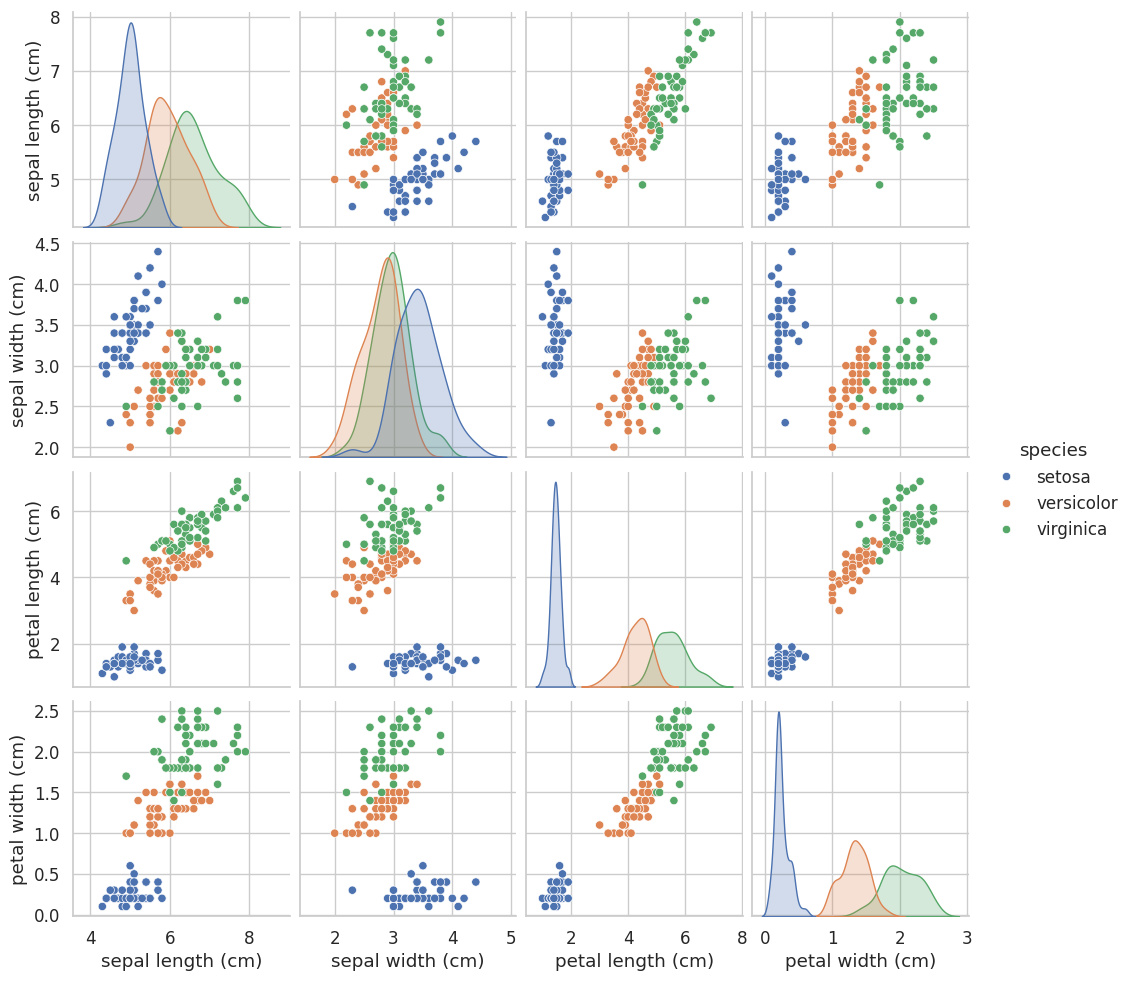

In [2]:
sns.set(font_scale=1.1)
sns.set_style('whitegrid')
grid = sns.pairplot(iris_df, hue='species', vars=iris_df.columns[0:4])

In [3]:
kmeans = KMeans(n_clusters=3, random_state=11)
kmeans.fit(iris.data)
print(kmeans.labels_[0:50])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [4]:
print(kmeans.labels_[50:100])

[2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [5]:
print(kmeans.labels_[100:150])

[2 1 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2
 2 1 2 2 2 1 2 2 2 1 2 2 1]


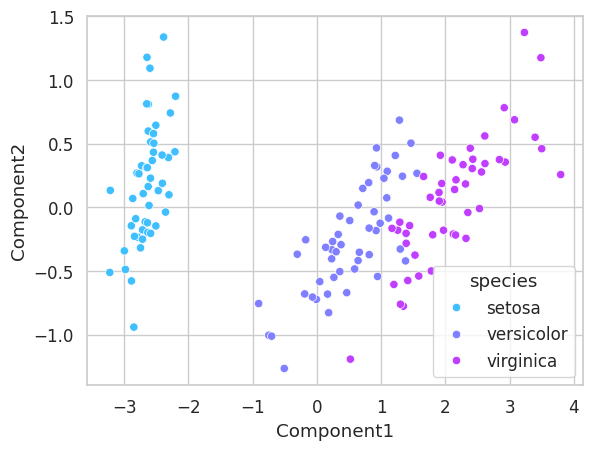

In [6]:
pca = PCA(n_components=2, random_state=11)

iris_pca = pca.fit_transform(iris.data)
iris_pca.shape


iris_pca_df = pd.DataFrame(iris_pca, columns=['Component1', 'Component2'])
iris_pca_df['species'] = iris_df.species

axes = sns.scatterplot(data=iris_pca_df,x='Component1', y='Component2', hue='species', legend='brief', palette='cool')

# axes = sns.scatterplot(data=iris_pca_df,
#                        x='Component1',
#                        y='Component2',
#                        hue='species',
#                        legend='brief',
#                        palette='cool')


In [7]:
iris_centers = pca.transform(kmeans.cluster_centers_)

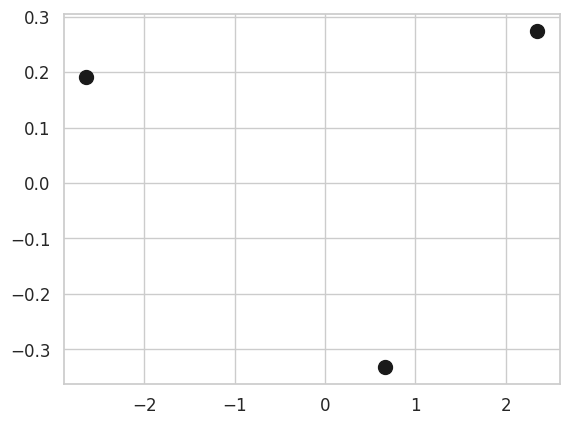

In [ ]:
dots = plt.scatter(iris_centers[:, 0], iris_centers[:, 1], s=100, c='k')

In [8]:
estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': AgglomerativeClustering(n_clusters=3)
}

# import numpy as np
# In [46]: for name, estimator in estimators.items():
# ...:
# estimator.fit(iris.data)
# ...:
# print(f'\n{name}:')
# ...:
# for i in range(0, 101, 50):
# ...:
# labels, counts = np.unique(
# ...:
# estimator.labels_[i:i+50], return_counts=True)
# ...:
# print(f'{i}-{i+50}:')
# ...:
# for label, count in zip(labels, counts):
# ...:
# print(f'
# label={label}, count={count}')

In [9]:
for name, estimator in estimators.items():
  estimator.fit(iris.data)
  print(f'\n{name}:')

  for i in range(0, 101, 50):
    labels, counts = np.unique(estimator.labels_[i:i+50], return_counts=True)
    print(f'{i}-{i+50}:')

    for label, count in zip(labels, counts):
      print(f'label={label}, count={count}')


KMeans:
0-50:
label=0, count=50
50-100:
label=1, count=47
label=2, count=3
100-150:
label=1, count=14
label=2, count=36

DBSCAN:
0-50:
label=-1, count=1
label=0, count=49
50-100:
label=-1, count=6
label=1, count=44
100-150:
label=-1, count=10
label=1, count=40

MeanShift:
0-50:
label=1, count=50
50-100:
label=0, count=49
label=1, count=1
100-150:
label=0, count=50

SpectralClustering:
0-50:
label=0, count=50
50-100:
label=2, count=50
100-150:
label=1, count=35
label=2, count=15

AgglomerativeClustering:
0-50:
label=1, count=50
50-100:
label=0, count=49
label=2, count=1
100-150:
label=0, count=15
label=2, count=35
